In [4]:
import numpy as np 
import pandas as pd 


In [5]:
# PROCEES THE DATA AND VISUALIZATION

**SENTIMENT ANALYSIS**

In [6]:
data=pd.read_table('/content/Restaurant_Reviews.tsv')
data


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [7]:
data = pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t')
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [10]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [11]:
data['Liked'].nunique()

2

In [12]:
print(data['Liked'].unique())

[1 0]


In [13]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [14]:
data.head

<bound method NDFrame.head of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

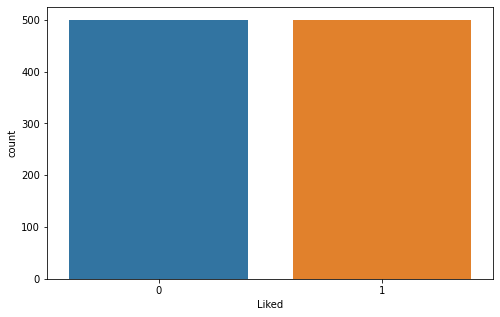

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x=data.Liked);

# SVC MODEL AND PIPELINE AND ML ALOGRITHM TO PREDICT

In [16]:
x=data['Review'].values
y=data['Liked'].values

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=44)

In [18]:
x_train.shape

(750,)

In [19]:
x_test.shape

(250,)

In [20]:
y_train.shape

(750,)

In [21]:
y_test.shape

(250,)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

**Support Vector Model**

In [23]:
from sklearn.svm import SVC
model=SVC()

In [24]:
model.fit(x_train_vect,y_train)

SVC()

**Evaluate the SVC (Model)**

In [25]:
y_pred=model.predict(x_test_vect)

In [26]:
# Accuracy,
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.748

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 74.8%
Precision score is: 0.84
Recall score is: 0.6


**USING PIPE LINE AND VECTORIZATION SEPRETELY(METHOD 2)**

In [28]:
from sklearn.pipeline import make_pipeline
model2=make_pipeline(CountVectorizer(),SVC())

In [29]:
model2.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [30]:
y_pred=model2.predict(x_test)


**Evaluate the PIPELINE (Model)**

In [31]:
accuracy_score(y_pred,y_test)

0.776

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 77.6%
Precision score is: 0.76
Recall score is: 0.79


# NAIVE BAYES MODEL  

**Training Model**

In [33]:
x_train_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
y_train

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [35]:
x_test_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
y_test

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1])

**MultinomialNB()**

In [37]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()
model3.fit(x_train_vect, y_train)

MultinomialNB()

In [38]:
# Predicting the Test set results
y_pred = model3.predict(x_test_vect)

In [39]:
# Accuracy,
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.752

In [40]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))


---- Scores ----
Accuracy score is: 75.2%
Precision score is: 0.71
Recall score is: 0.83


**pipeline multinomialNB**

In [41]:
model4=make_pipeline(CountVectorizer(),MultinomialNB())

In [42]:
model4.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [43]:
y_pred=model4.predict(x_test)

In [44]:
accuracy_score(y_pred,y_test)

0.768

In [45]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))


---- Scores ----
Accuracy score is: 76.8%
Precision score is: 0.74
Recall score is: 0.79


# Using joblib to save the model

**ML ALGORITHM FOR PREDICTING THE FINAL SENTIIMENT**

From above accuracy scores it is visible that SVC model with countVectorization pipeline is most effective with 0.776

In [2]:
import joblib


In [64]:
filename = 'reviews_classifier.sav'
joblib.dump(model2, open(filename, 'wb'))
loaded_model = joblib.load(open('reviews_classifier.sav', 'rb'))

In [73]:
loaded_model.predict(['hello!!Love Your Food'])



array([1])

In [67]:
loaded_model.predict(["not bad."])

array([0])

In [68]:
loaded_model.predict(["omg!!it was too spice and i asked you don't add too much "])

array([0])

In [69]:
loaded_model.predict(["Crust is not good."])


array([0])

In [70]:
loaded_model.predict(["Appetite instantly gone."])

array([1])

# Streamlit

In [ ]:
import streamlit as st
import numpy as np
import joblib
# loading the saved model
loaded_model = joblib.load(open('C:/Users/ASUS/OneDrive/Desktop/Major/reviews_classifier.sav', 'rb'))


# creating a function for Prediction

def Review_Analysis(input_data):

    input_data=[input_data]
    prediction = loaded_model.predict(input_data)

    if (prediction[0] == 0):
        st.error('NEGATIVE')
    else:
        st.success('POSITIVE')

def main():
    # giving a title
    st.title('Restaurant Review Analysis Web App')

    # getting the input data from the user

    Review = st.text_input('Enter Your Review')

    # creating a button for Prediction

    if st.button('Review Result'):
        Review_Analysis(Review)
      
if __name__ == '__main__':
    main()


**Sentiment Analysis**

Sentiment analysis is a technique through which you can analyze a piece of text to determine the sentiment behind it. It combines machine learning and natural language processing (NLP) to achieve this.

Using basic Sentiment analysis, a program can understand whether the sentiment behind a piece of text is positive, negative, or neutral.

It is a powerful technique in Artificial intelligence that has important business applications.

For example, you can use sentiment analysis to analyze customer feedback. After collecting that feedback through various mediums like Twitter and Facebook, you can run sentiment analysis algorithms on those text snippets to understand your customers' attitude towards your product.

The use cases of Sentiment Analysis can be-
Analyzing Customer Feedback
Campaign Monitoring
Brand Monitoring
Stock Market Analysis
Compliance Monitoring

Sentiment analysis is a powerful tool that you can use to solve problems from brand influence to market monitoring. New tools are built around sentiment analysis to help businesses become more efficient.

**Twitter Sentiments**

Twitter is one of the platforms widely used by people to express their opinions and showcase sentiments on various occasions. Sentiment analysis is an approach to analyze data and retrieve sentiment that it embodies

Sentiment Analysis Dataset Twitter has a number of applications:

Business: Companies use Twitter Sentiment Analysis to develop their business strategies, to assess customers’ feelings towards products or brand, how people respond to their campaigns or product launches and also why consumers are not buying certain products.

Politics: In politics Sentiment Analysis Dataset Twitter is used to keep track of political views, to detect consistency and inconsistency between statements and actions at the government level. Sentiment Analysis Dataset Twitter is also used for analyzing election results.

Public Actions: Twitter Sentiment Analysis also is used for monitoring and analyzing social phenomena, for predicting potentially dangerous situations and determining the general mood of the blogosphere.


